# Introduction to Convolutional Neural Network (CNN)




The limitations we are facing with datasets similar to MNIST are:

- The object to detect must be centered
- The should only be one object per image

To address these type of limitations we can use the Convolutional Neural Network (CNN) is an ANN that specializes in image/object recognition and classification. 

A CNN is a feed-forward NN with many more layers that the classical **percepton** and what makes it
very useful for image analysis and object detection is existence of one or more "special" layer that provides
the capability to recognize various types of **shapes**.


In this notebook we will some related techniques that allow us to build models that can overcome the above limitations.

The term **convolution** refers to a filter that can extract common to an object features from an image



### CNN designed for data that are spatially related

Each pixel is related to the pixels around it making it feasible to create some kind of an "assosiation" of a small portion of the image (usually a $3x3$ or $5x5$ matix of pixels).  Pixels that are close to each other tend to have more "logical relation" since they might be part of the same feature. We need to stuck convolution layers in order to understand different shapes.


The convolutional layer is training a large number of **fitlers** which are small matrixes of pixels to understand relations among neighoring pixels. Each filter is calculated for each valid position it the image as it can be seen in this example:

<img src="./images/filtering-1.png" style="width:310px"/>

<img src="./images/filtering-2.png" style="width:310px"/>

<img src="./images/filtering-3.png" style="width:310px"/>

<img src="./images/filtering-4.png" style="width:310px"/>

# The layers of a CNN

As we have seen before a ANN consists of the input and output layers who are connected with an sequence of hidden **fully connected** layers as we can see in the following picture:

<img src="./images/simple-ann.png" style="width:320px"/>

Altought the CNN conceptually is very similar to a classical ANN it still differs in its layer architecture.  

To achive feature extraction from an image we need to apply one of more layers of **filters** (called as convolutional layers) follows by a pooling layer which will "help" the NN to generalize when it will come to object detection. The **pooling** layer is followed by what we already have seen as "classical" NN.

Schematically we can visualize the architecture of a CNN using the following picture:

<img src="./images/convolutional-nn.png" style="width:520px"/>

## The convolutional Layer

This layer consists of the filters that we have discussed about and can think of them as "sliding" over the image trying to recongize patterns.

## The Pooling Layer

As seen above the pooling layer is "generalizing" the feature recongintion resulting to an improved "scanning performance".


In [2]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
from keras.utils import to_categorical
import pickle
import tensorflow as tf


%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [3]:
def _filter_value(pixels, row, col, filter):
    
    try:
        x = [
            pixels[row - 1][col - 1],
            pixels[row - 1][col],
            pixels[row - 1][col + 1],
            pixels[row][col - 1],
            pixels[row][col],
            pixels[row][col + 1],
            pixels[row + 1][col - 1],
            pixels[row + 1][col],
            pixels[row + 1][col + 1],
        ]
    except IndexError:
        return 0

    f = []
    for r in filter:
        f.extend(r)
    if len(x) == len(f):
        value = 0
        for k1, k2 in zip(x, f):            
            value += k1 * k2
        if value == 384: return 192
        return value
    else:
        return 0

def filter_all(pixels, cols, rows, filter):

    filtered = []
    for row in range(0, rows):
        filtered.append([_filter_value(pixels, row, col, filter) for col in range(0, cols)])
    return filtered


remove_horizontal_filter = [
    [0, 1, 0],
    [0, 1, 0],
    [0, 1, 0],
]

remove_vertical_filter = [
    [0, 0, 0],
    [1, 1, 1],
    [0, 0, 0],
]

    

# Filtering

Filtering images before we pass them to the training level
to bring features to forefront.

A filter consist of a set of multipliers.

The following example demonstrates the effect of a filter when passed to an image.

Let' assue the following image that consists of vertical and horizontal lines:

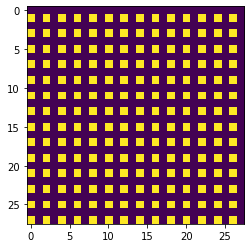

In [4]:
img =[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0, 192, 0]]
plt.imshow(img)
plt.show()

# Removing the Horizontal lines

A filter that can be applied to the image can be the following:

<img src="./images/horizontal-filter.png" style="width:120px"/>

applying this filter to image above as can be seen from the simple function that we are implemented here just to make the concept more tangible (in real world we use more effective implemenations of course) we are getting the following new image:

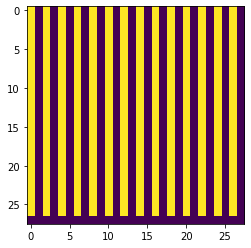

In [5]:
x = filter_all(img, 28, 28, remove_horizontal_filter)
plt.imshow(x)
plt.show()

# Removing the vertical lines

we can also apply another filter like the following to filter the vertical lines as well:

<img src="./images/vertical-filter.png" style="width:120px"/>


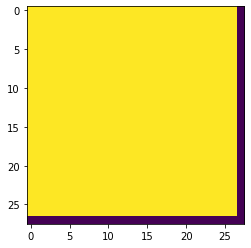

In [6]:
x = filter_all(x, 28, 28, remove_vertical_filter)
plt.imshow(x)
plt.show()

# Pooling

- Used to reduce the dimensions of the feauture maps.

- Summarises the features 

- This makes the model more robust to variations in the position of the features in the input image. 

<img src="./images/max-pooled.png" style="width:380px"/>



In [7]:
def show_pooling_effect(img):
    y = np.array(img)
    y = y.reshape(28,28)
    plt.imshow(y)
    plt.show()
    x = tf.constant(y)
    x = tf.reshape(x, [1, 28, 28, 1])
    max_pooling=tf.keras.layers.MaxPool2D(pool_size=(2, 2),strides=2)
    max_pooled_matrix=max_pooling(x)
    t = max_pooled_matrix.numpy()
    junk = t.reshape(14,14)
    plt.imshow(junk)
    plt.show()
    

### Examples of Pooling applied to images

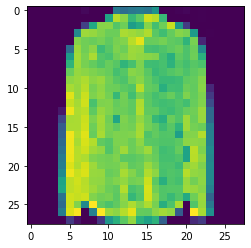

2022-11-01 11:29:34.150933: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-01 11:29:34.674261: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 161 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6


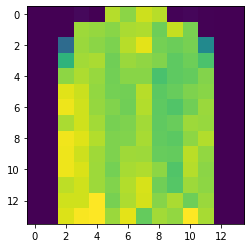

In [8]:
x = [0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,227,211,171,191,236,228,172,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,48,153,209,210,187,199,142,157,209,179,199,233,138,44,0,0,0,0,0,0,0,0,0,0,0,0,0,120,218,215,207,198,198,223,219,214,225,190,177,195,209,204,139,0,1,0,0,0,0,0,0,0,0,0,0,208,200,197,202,193,203,207,228,245,196,197,202,193,190,167,203,27,0,0,0,0,0,0,0,0,0,0,89,217,200,211,175,189,205,199,218,216,181,179,185,192,198,184,198,121,0,0,0,0,0,0,0,0,0,0,140,220,204,223,187,182,200,207,217,213,210,207,180,161,192,184,199,162,0,0,0,0,0,0,0,0,0,0,166,218,203,195,185,196,189,167,181,206,177,176,181,165,187,179,189,183,0,0,0,0,0,0,0,0,0,0,196,215,211,206,201,196,180,188,210,206,190,173,180,187,192,184,192,199,0,0,0,0,0,0,0,0,0,0,212,217,224,211,216,201,189,184,202,210,194,182,173,173,176,192,195,208,0,0,0,0,0,0,0,0,0,0,222,215,228,203,212,199,198,191,186,228,195,191,161,178,177,198,194,210,29,0,0,0,0,0,0,0,0,0,244,215,235,206,214,202,171,201,178,203,190,180,187,196,183,206,195,206,44,0,0,0,0,0,0,0,0,0,233,221,237,182,206,207,195,200,192,224,191,182,177,180,186,178,196,207,60,0,0,0,0,0,0,0,0,16,249,224,229,192,215,207,198,198,192,226,193,192,180,176,185,196,200,217,87,0,0,0,0,0,0,0,0,53,222,223,235,205,220,200,151,206,198,214,199,171,161,197,186,218,198,216,88,0,0,0,0,0,0,0,0,75,223,223,237,199,219,203,193,204,201,220,201,193,176,189,167,218,202,198,109,0,0,0,0,0,0,0,0,79,250,226,243,196,222,201,206,205,207,222,185,194,186,187,144,207,208,226,111,0,0,0,0,0,0,0,0,87,249,222,240,226,193,187,205,206,198,212,190,189,185,185,191,211,212,210,113,0,0,0,0,0,0,0,0,95,249,227,236,219,213,186,203,219,198,206,218,194,177,181,195,148,229,206,122,0,0,0,0,0,0,0,0,106,248,228,224,206,202,200,206,191,190,194,203,196,180,180,185,148,228,214,117,0,0,0,0,0,0,0,0,110,242,225,239,218,204,201,202,211,193,197,217,203,183,184,175,212,219,206,122,0,0,0,0,0,0,0,0,122,249,234,241,216,215,196,200,222,208,195,225,212,181,186,183,227,214,211,121,0,0,0,0,0,0,0,0,148,230,237,228,214,213,201,207,214,201,204,235,191,161,185,180,216,201,212,119,0,0,0,0,0,0,0,0,151,230,235,229,218,209,198,193,226,182,189,240,200,186,188,188,218,216,209,110,0,0,0,0,0,0,0,0,96,237,233,237,207,200,203,191,213,170,186,239,209,186,173,186,156,199,217,84,0,0,0,0,0,0,0,0,89,237,207,121,255,193,183,193,209,224,208,224,203,160,184,223,0,186,216,102,0,0,0,0,0,0,0,0,108,242,253,0,112,255,217,211,227,245,195,194,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0]
show_pooling_effect(x)

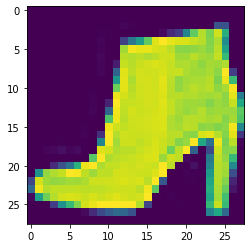

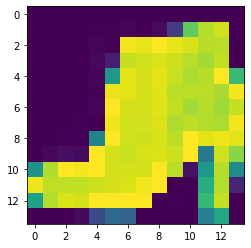

In [9]:
x = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,0,0,0,0,0,0,0,66,64,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,7,31,44,116,193,226,204,237,160,0,0,0,0,0,0,0,0,0,0,0,3,0,0,49,101,140,193,243,255,246,242,240,233,228,207,224,125,0,0,0,0,0,0,0,0,0,0,0,2,0,0,220,251,246,246,240,238,230,211,210,213,217,209,229,147,0,0,0,0,0,0,0,0,0,0,0,5,0,0,229,226,230,225,229,236,236,219,219,229,221,217,232,171,0,0,0,0,0,0,0,0,0,0,0,4,0,20,233,228,235,238,241,239,233,224,225,221,213,221,219,225,0,0,0,0,0,0,0,0,0,0,0,3,0,82,243,230,238,237,237,240,233,234,224,219,218,223,212,255,46,0,0,0,0,0,0,0,0,0,0,0,0,136,245,224,238,239,237,245,230,213,220,223,223,228,205,248,174,0,0,0,0,0,0,0,0,0,0,0,0,199,245,228,237,238,237,244,229,214,223,229,225,229,213,222,252,0,0,0,0,0,0,0,0,0,2,0,0,248,239,231,237,239,238,242,228,229,225,226,222,220,223,211,246,104,0,0,0,0,0,0,0,0,2,0,23,255,233,234,236,238,237,243,232,223,218,219,217,208,217,213,233,152,0,0,0,0,0,0,0,0,3,0,83,250,231,239,235,237,239,241,232,222,216,220,227,216,219,218,217,191,0,0,0,0,0,0,0,0,0,0,184,249,229,237,237,238,240,242,225,219,227,228,226,221,224,209,221,186,0,0,0,0,0,0,0,1,0,0,249,237,232,236,237,238,240,241,225,222,230,228,211,214,207,212,251,118,0,0,0,0,0,0,0,2,0,35,255,227,237,235,235,236,238,239,229,230,214,210,240,245,227,208,245,40,0,0,0,0,1,0,0,0,0,115,255,220,236,236,231,235,240,235,228,208,216,255,153,94,249,203,229,4,0,0,3,5,10,4,7,0,0,243,238,225,229,229,234,238,241,234,199,230,255,79,0,57,237,208,210,0,0,0,0,0,0,0,0,0,190,255,224,230,232,234,237,240,242,217,236,231,7,0,0,103,231,214,171,0,0,0,0,30,65,97,163,248,255,224,232,232,237,235,238,237,234,255,229,0,0,11,0,115,228,221,122,0,0,131,214,225,232,255,252,231,218,231,230,238,238,237,236,235,242,255,0,0,2,1,0,136,226,219,61,0,54,239,219,214,216,220,219,224,236,236,237,239,241,238,240,229,255,70,0,0,0,1,0,151,226,208,26,0,87,249,226,231,231,231,232,230,231,231,234,236,236,236,230,250,192,0,0,0,0,0,0,159,223,196,14,0,7,146,199,227,238,241,239,235,240,235,239,243,239,236,238,255,0,0,2,0,0,0,0,149,220,179,0,0,0,0,0,46,129,173,207,238,248,255,255,255,255,255,226,53,0,0,0,1,0,0,0,171,233,173,0,0,0,0,0,0,0,0,0,6,30,57,74,88,83,64,0,0,0,0,0,0,0,0,0,113,153,85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
show_pooling_effect(x)

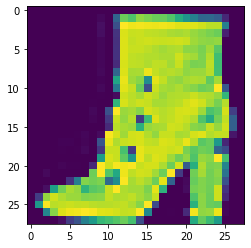

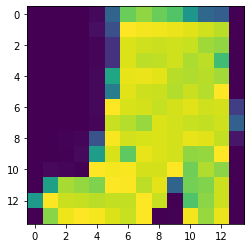

In [10]:
x= [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,82,198,185,213,205,198,197,186,159,134,111,85,86,76,28,0,0,0,0,0,0,0,0,0,0,0,10,0,62,255,249,251,249,248,250,248,243,244,243,237,229,229,110,0,0,0,0,0,0,0,0,0,0,0,9,0,38,241,234,235,231,230,228,223,221,224,216,210,204,198,22,0,0,0,0,0,0,0,0,0,0,0,4,0,36,242,232,235,237,235,234,235,237,234,219,213,211,214,0,0,0,0,0,0,0,0,0,0,0,0,4,0,37,242,234,234,230,225,220,224,226,212,212,204,219,189,0,0,0,0,0,0,0,0,0,0,0,0,4,0,37,242,231,229,226,226,223,223,237,224,220,205,226,177,0,0,0,0,0,0,0,0,0,0,0,0,4,0,31,240,231,230,225,231,230,220,234,214,204,206,230,177,0,0,0,0,0,0,0,0,0,0,0,0,5,0,84,242,222,223,248,232,225,228,224,213,217,217,228,178,0,0,0,0,0,0,0,0,0,0,0,0,2,0,151,247,219,210,124,245,232,217,213,221,225,223,193,220,0,0,0,0,0,0,0,0,0,0,0,0,5,0,107,244,233,197,61,235,222,219,224,215,209,199,203,255,69,0,0,0,0,0,0,0,0,0,0,0,1,0,7,236,229,222,236,229,217,225,226,227,235,227,225,216,169,0,0,0,0,0,0,0,0,0,0,1,0,0,168,240,230,236,233,222,222,226,229,238,244,237,220,203,227,0,0,0,0,0,0,0,0,0,0,5,0,63,255,217,221,209,239,233,227,231,239,240,238,219,183,192,239,47,0,0,0,0,0,0,0,0,0,3,0,42,234,214,227,44,174,242,228,232,238,234,225,185,156,201,232,78,0,0,0,0,0,0,0,0,0,0,0,30,229,222,218,164,216,221,223,237,235,227,210,206,232,215,237,78,0,0,0,0,0,0,0,1,4,0,7,253,239,219,238,240,226,214,234,234,222,224,239,244,226,232,232,15,0,0,0,0,0,2,2,0,3,0,66,247,225,234,237,240,232,230,241,239,232,247,227,190,197,137,27,0,0,0,0,0,0,1,0,1,6,0,41,234,234,181,44,246,238,239,239,235,238,204,190,200,196,81,58,0,0,0,0,0,0,0,0,0,0,0,142,240,234,192,135,247,230,242,238,219,200,213,185,215,210,255,181,0,0,0,0,0,0,3,1,1,0,28,255,236,252,249,253,234,239,239,224,198,239,73,160,225,204,207,116,0,0,0,0,6,0,0,0,0,0,199,255,187,154,249,231,238,236,220,199,255,44,0,200,221,201,211,97,0,0,0,0,0,0,0,36,110,208,201,206,88,126,254,222,230,221,199,245,82,0,6,196,207,201,207,64,0,0,0,0,10,145,200,222,215,167,190,195,233,255,225,220,220,205,245,165,0,0,8,202,207,200,236,37,0,0,0,46,215,237,224,217,217,207,209,211,232,224,226,231,221,211,234,0,0,0,0,185,211,198,236,27,0,0,0,137,254,229,232,235,232,233,229,227,228,230,232,224,209,255,57,0,0,0,0,163,211,197,194,3,0,0,0,0,116,210,242,249,251,255,252,243,242,238,232,234,255,118,0,0,1,0,30,251,213,216,248,4,0,0,0,0,0,0,10,46,65,111,139,171,178,187,198,180,61,0,0,0,0,0,0,157,194,174,141,0,0,0]
show_pooling_effect(x)

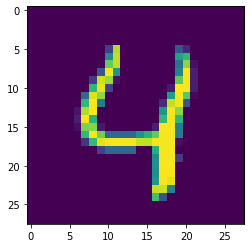

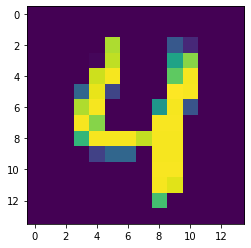

In [11]:
x = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,224,0,0,0,0,0,0,0,70,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,231,0,0,0,0,0,0,0,148,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,195,231,0,0,0,0,0,0,0,96,210,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,69,252,134,0,0,0,0,0,0,0,114,252,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,236,217,12,0,0,0,0,0,0,0,192,252,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,168,247,53,0,0,0,0,0,0,0,18,255,253,21,0,0,0,0,0,0,0,0,0,0,0,0,0,84,242,211,0,0,0,0,0,0,0,0,141,253,189,5,0,0,0,0,0,0,0,0,0,0,0,0,0,169,252,106,0,0,0,0,0,0,0,32,232,250,66,0,0,0,0,0,0,0,0,0,0,0,0,0,15,225,252,0,0,0,0,0,0,0,0,134,252,211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,252,164,0,0,0,0,0,0,0,0,169,252,167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,204,209,18,0,0,0,0,0,0,22,253,253,107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169,252,199,85,85,85,85,129,164,195,252,252,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41,170,245,252,252,252,252,232,231,251,252,252,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49,84,84,84,84,0,0,161,252,252,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,127,252,252,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,253,253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,127,252,252,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,135,252,244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,232,236,111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,179,66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
show_pooling_effect(x)